# Creating Molecular Graphs in Graphein

[Graphein](https://github.com/a-r-j/graphein) provides a set of tools for working with molecular graphs. Under the hood, we wrap [RDKit](https://www.rdkit.org/) functions for the graph construction. While the main format used is a [NetworkX](https://networkx.org/) `nx.Graph`, each graph, node & edge has its underlying [RDKit object](https://www.rdkit.org/docs/source/rdkit.Chem.rdchem.html) stored as metadata so RDKit methods can still be used.

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/a-r-j/graphein/blob/master/notebooks/molecule_tutorial.ipynb) [![GitHub](https://img.shields.io/badge/-View%20on%20GitHub-181717?logo=github&logoColor=ffffff)](https://github.com/a-r-j/graphein/blob/master/notebooks/molecule_tutorial.ipynb)

In [4]:
# Install Graphein if necessary
# !pip install graphein[extras]

In [5]:
import networkx as nx
import logging
from rich import inspect, print
logging.getLogger("matplotlib").setLevel(logging.WARNING)

import graphein.molecule as gm

RDKit WARNING: [14:28:33] Enabling RDKit 2019.09.3 jupyter extensions
[14:28:33] Enabling RDKit 2019.09.3 jupyter extensions


## Config
Similar to [Protein Graph Construction](https://graphein.ai/notebooks/residue_graphs.html), configuration of small molecule graphs is controlled by a [`MoleculeGraphConfig`]() object.

In [6]:
config = gm.MoleculeGraphConfig()
inspect(config)

╭───────────────── <class 'graphein.molecule.config.MoleculeGraphConfig'> ──────────────────╮
│ Config Object for Molecule Structure Graph Construction.                                  │
│                                                                                           │
│ ╭───────────────────────────────────────────────────────────────────────────────────────╮ │
│ │ MoleculeGraphConfig(verbose=False, add_hs=False, generate_conformer=False,            │ │
│ │ edge_construction_functions=[<function add_fully_connected_edges at 0x7f10c593f9d0>,  │ │
│ │ <function add_k_nn_edges at 0x7f10c593fa60>, <function add_distance_threshold at      │ │
│ │ 0x7f10c593f940>, <function add_atom_bonds at 0x7f10c593f550>],                        │ │
│ │ node_metadata_functions=[<function atom_type_one_hot at 0x7f10c56e1f70>],             │ │
│ │ edge_metadata_functions=None, graph_metadata_functions=None)                          │ │
│ ╰───────────────────────────────────────────────────────────────────────────────────────╯ │
│                                                                                           │
│                      add_hs = False                                                       │
│ edge_construction_functions = [                                                           │
│                                   <function add_fully_connected_edges at 0x7f10c593f9d0>, │
│                                   <function add_k_nn_edges at 0x7f10c593fa60>,            │
│                                   <function add_distance_threshold at 0x7f10c593f940>,    │
│                                   <function add_atom_bonds at 0x7f10c593f550>             │
│                               ]                                                           │
│     edge_metadata_functions = None                                                        │
│          generate_conformer = False                                                       │
│    graph_metadata_functions = None                                                        │
│     node_metadata_functions = [<function atom_type_one_hot at 0x7f10c56e1f70>]            │
│                     verbose = False                                                       │
╰───────────────────────────────────────────────────────────────────────────────────────────╯

## Creating Graphs

### Creating a Molecular Graph from SMILES

Let's take a look at a simple molecule, acetylsalicylic acid (or aspirin as it's more commonly known).

Graph named 'CC(=O)OC1=CC=CC=C1C(=O)O' with 13 nodes and 13 edges

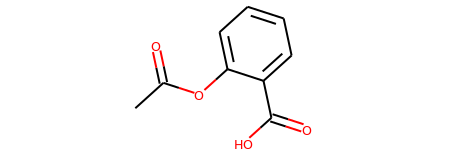

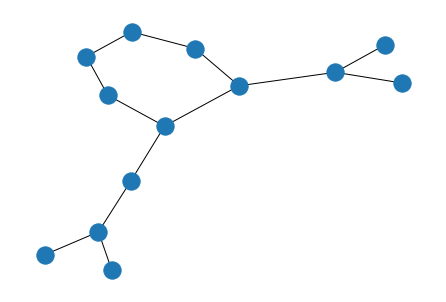

In [7]:
graph = gm.construct_graph(smiles="CC(=O)OC1=CC=CC=C1C(=O)O", config=config)
print(graph)
nx.draw(graph)
graph.graph["rdmol"]

Molecule features are stored as dictionaries on the graph, nodes and edges.

In [8]:
# Node metadata
for n, d in graph.nodes(data=True):
    print(d)

{
    'atomic_num': 6,
    'element': 'C',
    'rdmol_atom': <rdkit.Chem.rdchem.Atom object at 0x7f10c5030460>,
    'coords': None,
    'atom_type_one_hot': array([1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])
}

{
    'atomic_num': 6,
    'element': 'C',
    'rdmol_atom': <rdkit.Chem.rdchem.Atom object at 0x7f10c50304c0>,
    'coords': None,
    'atom_type_one_hot': array([1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])
}

{
    'atomic_num': 8,
    'element': 'O',
    'rdmol_atom': <rdkit.Chem.rdchem.Atom object at 0x7f10c5030520>,
    'coords': None,
    'atom_type_one_hot': array([0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0])
}

{
    'atomic_num': 8,
    'element': 'O',
    'rdmol_atom': <rdkit.Chem.rdchem.Atom object at 0x7f10c5030580>,
    'coords': None,
    'atom_type_one_hot': array([0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0])
}

{
    'atomic_num': 6,
    'element': 'C',
    'rdmol_atom': <rdkit.Chem.rdchem.Atom object at 0x7f10c50305e0>,
    'coords': None,
    'atom_type_one_hot': array([1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])
}

{
    'atomic_num': 6,
    'element': 'C',
    'rdmol_atom': <rdkit.Chem.rdchem.Atom object at 0x7f10c5030640>,
    'coords': None,
    'atom_type_one_hot': array([1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])
}

{
    'atomic_num': 6,
    'element': 'C',
    'rdmol_atom': <rdkit.Chem.rdchem.Atom object at 0x7f10c50306a0>,
    'coords': None,
    'atom_type_one_hot': array([1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])
}

{
    'atomic_num': 6,
    'element': 'C',
    'rdmol_atom': <rdkit.Chem.rdchem.Atom object at 0x7f10c5030700>,
    'coords': None,
    'atom_type_one_hot': array([1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])
}

{
    'atomic_num': 6,
    'element': 'C',
    'rdmol_atom': <rdkit.Chem.rdchem.Atom object at 0x7f10c5030760>,
    'coords': None,
    'atom_type_one_hot': array([1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])
}

{
    'atomic_num': 6,
    'element': 'C',
    'rdmol_atom': <rdkit.Chem.rdchem.Atom object at 0x7f10c50307c0>,
    'coords': None,
    'atom_type_one_hot': array([1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])
}

{
    'atomic_num': 6,
    'element': 'C',
    'rdmol_atom': <rdkit.Chem.rdchem.Atom object at 0x7f10c5030820>,
    'coords': None,
    'atom_type_one_hot': array([1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])
}

{
    'atomic_num': 8,
    'element': 'O',
    'rdmol_atom': <rdkit.Chem.rdchem.Atom object at 0x7f10c5030880>,
    'coords': None,
    'atom_type_one_hot': array([0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0])
}

{
    'atomic_num': 8,
    'element': 'O',
    'rdmol_atom': <rdkit.Chem.rdchem.Atom object at 0x7f10c50308e0>,
    'coords': None,
    'atom_type_one_hot': array([0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0])
}

In [9]:
# Edge metadata
for u, v, d in graph.edges(data=True):
    print(d)

{'kind': {'bond'}, 'bond': <rdkit.Chem.rdchem.Bond object at 0x7f10c5030dc0>}

{'kind': {'bond'}, 'bond': <rdkit.Chem.rdchem.Bond object at 0x7f10c5030e20>}

{'kind': {'bond'}, 'bond': <rdkit.Chem.rdchem.Bond object at 0x7f10c5030e80>}

{'kind': {'bond'}, 'bond': <rdkit.Chem.rdchem.Bond object at 0x7f10c5030ee0>}

{'kind': {'bond'}, 'bond': <rdkit.Chem.rdchem.Bond object at 0x7f10c5030f40>}

{'kind': {'bond'}, 'bond': <rdkit.Chem.rdchem.Bond object at 0x7f10c5048280>}

{'kind': {'bond'}, 'bond': <rdkit.Chem.rdchem.Bond object at 0x7f10c5030fa0>}

{'kind': {'bond'}, 'bond': <rdkit.Chem.rdchem.Bond object at 0x7f10c5048040>}

{'kind': {'bond'}, 'bond': <rdkit.Chem.rdchem.Bond object at 0x7f10c50480a0>}

{'kind': {'bond'}, 'bond': <rdkit.Chem.rdchem.Bond object at 0x7f10c5048100>}

{'kind': {'bond'}, 'bond': <rdkit.Chem.rdchem.Bond object at 0x7f10c5048160>}

{'kind': {'bond'}, 'bond': <rdkit.Chem.rdchem.Bond object at 0x7f10c50481c0>}

{'kind': {'bond'}, 'bond': <rdkit.Chem.rdchem.Bond object at 0x7f10c5048220>}

### Creating a Molecular Graph from an SDF File

As SDFs & Mol2 files provide coordinates, we can draw the graph in 3D.

Graph named 'long_test' with 20 nodes and 21 edges

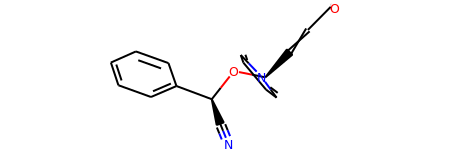

In [10]:
graph = gm.construct_graph(path="../tests/molecule/test_data/long_test.sdf", config=config)
print(graph)
graph.graph["rdmol"]

In [11]:
gm.plotly_molecular_graph(graph)

### Creating a Molecular Graph from a Mol2 File

Graph named 'short_test' with 3 nodes and 2 edges

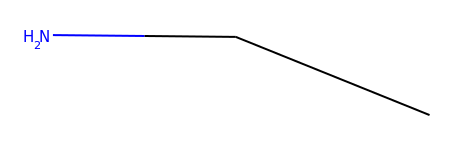

In [12]:
graph = gm.construct_graph(path="../tests/molecule/test_data/short_test.mol2", config=config)
print(graph)
graph.graph["rdmol"]

In [13]:
gm.plotly_molecular_graph(graph)

## Adding Features
Graphein can add lots of features to graph nodes and edges from RDKit

### Node Features




In [14]:
from functools import partial

config = gm.MoleculeGraphConfig(
    node_metadata_functions=[
        gm.atom_type_one_hot,
        gm.atomic_mass,
        gm.degree,
        gm.total_degree,
        gm.total_valence,
        gm.explicit_valence,
        gm.implicit_valence,
        gm.num_explicit_h,
        gm.num_implicit_h,
        gm.total_num_h,
        gm.num_radical_electrons,
        gm.formal_charge,
        gm.hybridization,
        gm.is_aromatic,
        gm.is_isotope,
        gm.is_ring,
        gm.chiral_tag,
        partial(gm.is_ring_size, ring_size=5),
        partial(gm.is_ring_size, ring_size=7)
    ]
)
graph = gm.construct_graph(path="../tests/molecule/test_data/short_test.mol2", config=config)

for n, d in graph.nodes(data=True):
    print(d)

INFO:graphein.molecule.edges.distance:Found: 3 KNN edges
INFO:graphein.molecule.edges.distance:Found: 9 distance edges for radius 5.0


{
    'atomic_num': 6,
    'element': 'C',
    'rdmol_atom': <rdkit.Chem.rdchem.Atom object at 0x7f10c4e35d60>,
    'coords': array([ 0.9862, -0.257 , -0.1905]),
    'atom_type_one_hot': array([1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]),
    'mass': 12.011,
    'degree': 1,
    'total_degree': 4,
    'total_valence': 4,
    'explicit_valence': 4,
    'implicit_valence': 0,
    'num_explicit_h': 3,
    'num_implicit_h': 0,
    'total_num_h': 3,
    'num_radical_electrons': 0,
    'formal_charge': 0,
    'hybridization': rdkit.Chem.rdchem.HybridizationType.SP3,
    'is_aromatic': False,
    'is_isotope': 0,
    'is_ring': False,
    'chiral_tag': rdkit.Chem.rdchem.ChiralType.CHI_UNSPECIFIED,
    'is_ring_5': False,
    'is_ring_7': False
}

{
    'atomic_num': 6,
    'element': 'C',
    'rdmol_atom': <rdkit.Chem.rdchem.Atom object at 0x7f10c4e359a0>,
    'coords': array([-0.2052,  0.2236,  0.6206]),
    'atom_type_one_hot': array([1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]),
    'mass': 12.011,
    'degree': 2,
    'total_degree': 4,
    'total_valence': 4,
    'explicit_valence': 4,
    'implicit_valence': 0,
    'num_explicit_h': 2,
    'num_implicit_h': 0,
    'total_num_h': 2,
    'num_radical_electrons': 0,
    'formal_charge': 0,
    'hybridization': rdkit.Chem.rdchem.HybridizationType.SP3,
    'is_aromatic': False,
    'is_isotope': 0,
    'is_ring': False,
    'chiral_tag': rdkit.Chem.rdchem.ChiralType.CHI_UNSPECIFIED,
    'is_ring_5': False,
    'is_ring_7': False
}

{
    'atomic_num': 7,
    'element': 'N',
    'rdmol_atom': <rdkit.Chem.rdchem.Atom object at 0x7f10c4e358e0>,
    'coords': array([-1.4201,  0.2357, -0.1847]),
    'atom_type_one_hot': array([0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0]),
    'mass': 14.007,
    'degree': 1,
    'total_degree': 3,
    'total_valence': 3,
    'explicit_valence': 3,
    'implicit_valence': 0,
    'num_explicit_h': 2,
    'num_implicit_h': 0,
    'total_num_h': 2,
    'num_radical_electrons': 0,
    'formal_charge': 0,
    'hybridization': rdkit.Chem.rdchem.HybridizationType.SP3,
    'is_aromatic': False,
    'is_isotope': 0,
    'is_ring': False,
    'chiral_tag': rdkit.Chem.rdchem.ChiralType.CHI_UNSPECIFIED,
    'is_ring_5': False,
    'is_ring_7': False
}

### Edge Features

In [15]:
config = gm.MoleculeGraphConfig(
    edge_metadata_functions=[
        gm.add_bond_type,
        gm.bond_is_aromatic,
        gm.bond_is_conjugated,
        gm.bond_is_in_ring,
        gm.bond_stereo,
        partial(gm.bond_is_in_ring_size, ring_size=5),
        partial(gm.bond_is_in_ring_size, ring_size=7)
    ]
)
graph = gm.construct_graph(path="../tests/molecule/test_data/short_test.mol2", config=config)

for u, v, d in graph.edges(data=True):
    print(d)

INFO:graphein.molecule.edges.distance:Found: 3 KNN edges
INFO:graphein.molecule.edges.distance:Found: 9 distance edges for radius 5.0
DEBUG:graphein.molecule.features.edges.bonds:No RDKit bond found on edge C:0-C:0
DEBUG:graphein.molecule.features.edges.bonds:No RDKit bond found on edge C:0-N:2
DEBUG:graphein.molecule.features.edges.bonds:No RDKit bond found on edge C:1-C:1
DEBUG:graphein.molecule.features.edges.bonds:No RDKit bond found on edge N:2-N:2
DEBUG:graphein.molecule.features.edges.bonds:No RDKit bond found on edge C:0-C:0
DEBUG:graphein.molecule.features.edges.bonds:No RDKit bond found on edge C:0-N:2
DEBUG:graphein.molecule.features.edges.bonds:No RDKit bond found on edge C:1-C:1
DEBUG:graphein.molecule.features.edges.bonds:No RDKit bond found on edge N:2-N:2
DEBUG:graphein.molecule.features.edges.bonds:No RDKit bond found on edge C:0-C:0
DEBUG:graphein.molecule.features.edges.bonds:No RDKit bond found on edge C:0-N:2
DEBUG:graphein.molecule.features.edges.bonds:No RDKit bo

{
    'kind': {'distance_threshold', 'fully_connected'},
    'bond_type': None,
    'aromatic': None,
    'conjugated': None,
    'ring': None,
    'bond_stereo': None,
    'ring_size_5': None,
    'ring_size_7': None
}

{
    'kind': {'distance_threshold', 'bond', 'fully_connected', 'k_nn_1'},
    'bond': <rdkit.Chem.rdchem.Bond object at 0x7f10c4e68820>,
    'bond_type': rdkit.Chem.rdchem.BondType.SINGLE,
    '_aromatic': False,
    'conjugated': False,
    'ring': False,
    'bond_stereo': rdkit.Chem.rdchem.BondStereo.STEREONONE,
    'ring_size_5': False,
    'ring_size_7': False
}

{
    'kind': {'distance_threshold', 'fully_connected'},
    'bond_type': None,
    'aromatic': None,
    'conjugated': None,
    'ring': None,
    'bond_stereo': None,
    'ring_size_5': None,
    'ring_size_7': None
}

{
    'kind': {'distance_threshold', 'fully_connected'},
    'bond_type': None,
    'aromatic': None,
    'conjugated': None,
    'ring': None,
    'bond_stereo': None,
    'ring_size_5': None,
    'ring_size_7': None
}

{
    'kind': {'distance_threshold', 'bond', 'fully_connected', 'k_nn_1'},
    'bond': <rdkit.Chem.rdchem.Bond object at 0x7f10c4cb6220>,
    'bond_type': rdkit.Chem.rdchem.BondType.SINGLE,
    '_aromatic': False,
    'conjugated': False,
    'ring': False,
    'bond_stereo': rdkit.Chem.rdchem.BondStereo.STEREONONE,
    'ring_size_5': False,
    'ring_size_7': False
}

{
    'kind': {'distance_threshold', 'fully_connected'},
    'bond_type': None,
    'aromatic': None,
    'conjugated': None,
    'ring': None,
    'bond_stereo': None,
    'ring_size_5': None,
    'ring_size_7': None
}

### Graph Features
Global descriptors of the molecule computed by RDKit can be added to the graph too!

In [16]:
config = gm.MoleculeGraphConfig(
    graph_metadata_functions=[
        gm.mol_descriptors
    ]
)
graph = gm.construct_graph(path="../tests/molecule/test_data/short_test.mol2", config=config)

print(graph.graph)

INFO:graphein.molecule.edges.distance:Found: 3 KNN edges
INFO:graphein.molecule.edges.distance:Found: 9 distance edges for radius 5.0


{
    'name': 'short_test',
    'rdmol': <rdkit.Chem.rdchem.Mol object at 0x7f10c5030820>,
    'coords': array([[ 0.9862, -0.257 , -0.1905],
       [-0.2052,  0.2236,  0.6206],
       [-1.4201,  0.2357, -0.1847]]),
    'smiles': 'CCN',
    'config': MoleculeGraphConfig(verbose=False, add_hs=False, generate_conformer=False, 
edge_construction_functions=[<function add_fully_connected_edges at 0x7f10c593f9d0>, 
<function add_k_nn_edges at 0x7f10c593fa60>, <function add_distance_threshold at 
0x7f10c593f940>, <function add_atom_bonds at 0x7f10c593f550>], 
node_metadata_functions=[<function atom_type_one_hot at 0x7f10c56e1f70>], 
edge_metadata_functions=None, graph_metadata_functions=[<function mol_descriptors at 
0x7f10c5945280>]),
    'MaxEStateIndex': 4.847222222222222,
    'MinEStateIndex': 0.75,
    'MaxAbsEStateIndex': 4.847222222222222,
    'MinAbsEStateIndex': 0.75,
    'qed': 0.40623709538988323,
    'MolWt': 45.084999999999994,
    'HeavyAtomMolWt': 38.028999999999996,
    'ExactMolWt': 45.057849223999995,
    'NumValenceElectrons': 20,
    'NumRadicalElectrons': 0,
    'MaxPartialCharge': -0.010576265829206462,
    'MinPartialCharge': -0.3307484184390755,
    'MaxAbsPartialCharge': 0.3307484184390755,
    'MinAbsPartialCharge': 0.010576265829206462,
    'FpDensityMorgan1': 2.0,
    'FpDensityMorgan2': 2.0,
    'FpDensityMorgan3': 2.0,
    'BalabanJ': 1.6329931618554523,
    'BertzCT': 2.7548875021634682,
    'Chi0': 2.7071067811865475,
    'Chi0n': 2.284457050376173,
    'Chi0v': 2.284457050376173,
    'Chi1': 1.4142135623730951,
    'Chi1n': 1.1153550716504106,
    'Chi1v': 1.1153550716504106,
    'Chi2n': 0.408248290463863,
    'Chi2v': 0.408248290463863,
    'Chi3n': 0.0,
    'Chi3v': 0.0,
    'Chi4n': 0.0,
    'Chi4v': 0.0,
    'HallKierAlpha': -0.04,
    'Ipc': 2.7548875021634682,
    'Kappa1': 2.9600000000000004,
    'Kappa2': 1.96,
    'Kappa3': 1.9600000000000033,
    'LabuteASA': 20.444083839238875,
    'PEOE_VSA1': 5.733667477162185,
    'PEOE_VSA10': 0.0,
    'PEOE_VSA11': 0.0,
    'PEOE_VSA12': 0.0,
    'PEOE_VSA13': 0.0,
    'PEOE_VSA14': 0.0,
    'PEOE_VSA2': 0.0,
    'PEOE_VSA3': 0.0,
    'PEOE_VSA4': 0.0,
    'PEOE_VSA5': 0.0,
    'PEOE_VSA6': 6.923737199690624,
    'PEOE_VSA7': 6.544756405912575,
    'PEOE_VSA8': 0.0,
    'PEOE_VSA9': 0.0,
    'SMR_VSA1': 0.0,
    'SMR_VSA10': 0.0,
    'SMR_VSA2': 0.0,
    'SMR_VSA3': 0.0,
    'SMR_VSA4': 5.733667477162185,
    'SMR_VSA5': 6.923737199690624,
    'SMR_VSA6': 6.544756405912575,
    'SMR_VSA7': 0.0,
    'SMR_VSA8': 0.0,
    'SMR_VSA9': 0.0,
    'SlogP_VSA1': 5.733667477162185,
    'SlogP_VSA10': 0.0,
    'SlogP_VSA11': 0.0,
    'SlogP_VSA12': 0.0,
    'SlogP_VSA2': 6.544756405912575,
    'SlogP_VSA3': 0.0,
    'SlogP_VSA4': 0.0,
    'SlogP_VSA5': 6.923737199690624,
    'SlogP_VSA6': 0.0,
    'SlogP_VSA7': 0.0,
    'SlogP_VSA8': 0.0,
    'SlogP_VSA9': 0.0,
    'TPSA': 26.02,
    'EState_VSA1': 0.0,
    'EState_VSA10': 0.0,
    'EState_VSA11': 0.0,
    'EState_VSA2': 0.0,
    'EState_VSA3': 0.0,
    'EState_VSA4': 6.544756405912575,
    'EState_VSA5': 0.0,
    'EState_VSA6': 0.0,
    'EState_VSA7': 6.923737199690624,
    'EState_VSA8': 0.0,
    'EState_VSA9': 5.733667477162185,
    'VSA_EState1': 0.0,
    'VSA_EState10': 0.0,
    'VSA_EState2': 0.0,
    'VSA_EState3': 0.0,
    'VSA_EState4': 4.847222222222222,
    'VSA_EState5': 0.0,
    'VSA_EState6': 0.0,
    'VSA_EState7': 0.0,
    'VSA_EState8': 2.6527777777777777,
    'VSA_EState9': 0.0,
    'FractionCSP3': 1.0,
    'HeavyAtomCount': 3,
    'NHOHCount': 2,
    'NOCount': 1,
    'NumAliphaticCarbocycles': 0,
    'NumAliphaticHeterocycles': 0,
    'NumAliphaticRings': 0,
    'NumAromaticCarbocycles': 0,
    'NumAromaticHeterocycles': 0,
    'NumAromaticRings': 0,
    'NumHAcceptors': 1,
    'NumHDonors': 1,
    'NumHeteroatoms': 1,
    'NumRotatableBonds': 0,
    'NumSaturatedCarbocycles': 0,
    'NumSaturatedHeterocycles': 0,
    'NumSaturatedRings': 0,
    'RingCount': 0,
    'MolLogP': -0.03499999999999